In [1]:
!pip install eli5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import eli5

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from eli5.sklearn import PermutationImportance

In [3]:
dados = pd.read_csv('CarPrice_Assignment.csv', sep=',')

In [4]:
dados.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
dados.duplicated().sum()

0

In [7]:
colsToPlot = ['symboling', 'fueltype', 'aspiration', 'doornumber',
               'carbody',  'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

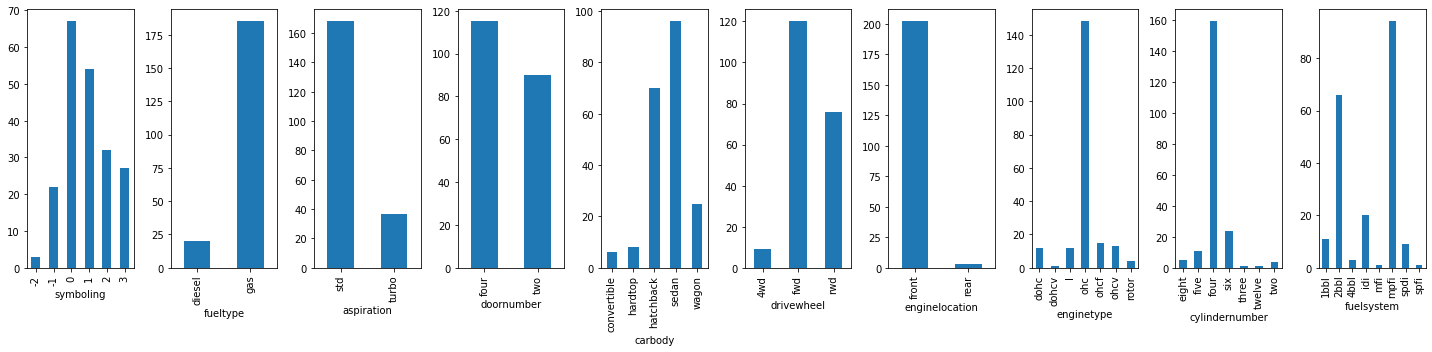

In [8]:
fig, axes = plt.subplots(nrows = 1, ncols = len(colsToPlot), figsize=(20,5) )

for plotNumber, colName in enumerate(colsToPlot):
    dados.groupby(colName).size().plot(kind='bar', ax = axes[plotNumber])

plt.tight_layout()

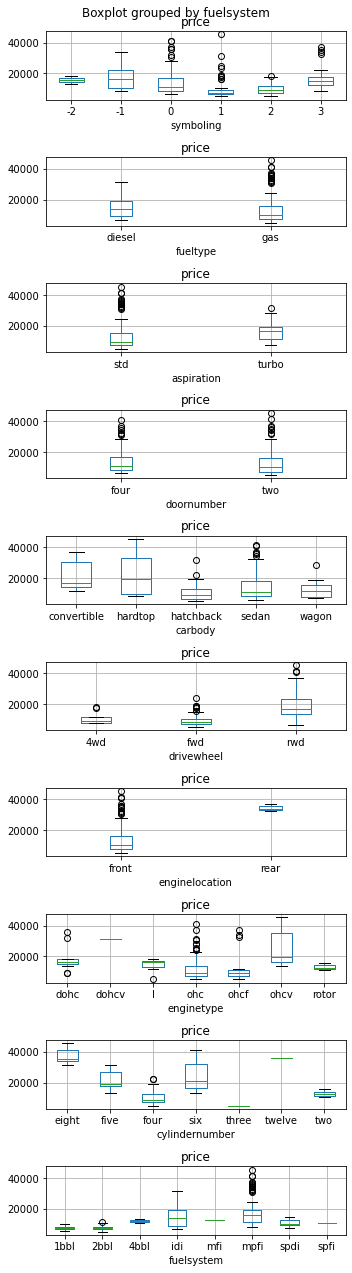

In [9]:
fig, axes = plt.subplots(nrows = len(colsToPlot), ncols = 1, figsize=(5, 18) )

for plotNumber, colName in enumerate(colsToPlot):
    dados.boxplot(column='price', by= colName, vert= True, figsize=(5,5), ax=axes[plotNumber] )

plt.tight_layout()

In [10]:
for i in colsToPlot:
    dados[i] = dados[i].astype('category')

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    category
 2   CarName           205 non-null    object  
 3   fueltype          205 non-null    category
 4   aspiration        205 non-null    category
 5   doornumber        205 non-null    category
 6   carbody           205 non-null    category
 7   drivewheel        205 non-null    category
 8   enginelocation    205 non-null    category
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    category
 15  cylindernumber    205 non-null    category
 16  enginesize        205 non-

In [12]:
dados.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
dados = pd.get_dummies(dados, drop_first=True)

In [14]:
dados.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
y = dados['price']
del dados['price']
del dados['car_ID']
X = dados

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=42)

In [17]:
#RANDOMFOREST

sc = StandardScaler()
sc.fit(X_train, y_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [18]:
params = {
    'n_estimators' : [int(x) for x in np.linspace(100, 2000, num=20)],
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : [int(x) for x in np.linspace(5, 30, num=5)],
    'min_samples_split' : [2, 5, 10, 20],
    'min_samples_leaf' : [1, 2, 4, 5, 10]
}

In [19]:
rf = RandomForestRegressor()

In [20]:
grid_rf = RandomizedSearchCV(rf, param_distributions=params, n_iter=100, cv=5, scoring='neg_mean_squared_error', verbose=2)

In [ ]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=1300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=1300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=1300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=1300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=1300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=1300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=800, min_samples_split=10, min_sam

[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=11, total=   0.7s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=11 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=11, total=   0.7s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=11 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=11, total=   0.7s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=11 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=11, total=   0.7s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=11 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=11, total=   0.7s
[CV] n_estimators=1200, min_sample

In [23]:
best_rf = grid_rf.best_estimator_

In [24]:
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, min_samples_split=5, n_estimators=1200)

In [26]:
y_pred = best_rf.predict(X_test)

In [27]:
print('MSE (Treino)', mean_squared_error(y_train, best_rf.predict(X_train)))
print('RMSE (Treino)', np.sqrt(mean_squared_error(y_train, best_rf.predict(X_train))))

MSE (Treino) 1001303.2017832634
RMSE (Treino) 1000.6513887379876


In [28]:
print('MSE (Teste)', mean_squared_error(y_test, y_pred))
print('RMSE (Teste)', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE (Teste) 4150718.0028923727
RMSE (Teste) 2037.3310980035553


In [29]:
perm  = PermutationImportance(best_rf).fit(X_train, y_train)

In [30]:
eli5.show_weights(perm, feature_names = list(dados.columns))

Weight,Feature
0.7523 ± 0.0935,enginesize
0.2820 ± 0.0369,curbweight
0.0138 ± 0.0021,highwaympg
0.0115 ± 0.0038,horsepower
0.0083 ± 0.0031,carwidth
0.0052 ± 0.0014,peakrpm
0.0042 ± 0.0013,wheelbase
0.0032 ± 0.0008,carlength
0.0032 ± 0.0008,stroke
0.0032 ± 0.0009,citympg
